<a href="https://colab.research.google.com/github/tifftknguyen/Final-Project-456/blob/main/final-project-456.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Final Project
## Tiffany Nguyen
## Giselle Hernandez
## CECS 456 Sec 01 - Machine Learning
## Professor Wenlu Zhang

### Comparing CNN vs Fully Connected Neural Network on Natural Images Data Set

In [213]:
! pip install -q kaggle

# Loading Data Set

In [214]:
import kagglehub

In [215]:
path = kagglehub.dataset_download("prasunroy/natural-images")

Using Colab cache for faster access to the 'natural-images' dataset.


In [216]:
print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/natural-images


## Set Up Imports & Parameters

In [217]:
# INITIAL SETUP

import os, tensorflow as tf
from tensorflow.keras import layers, models


# imports based on the labs & hw to create visuals
import sklearn
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt


In [218]:
data_dir = os.path.join(path, "natural_images")

In [219]:
# SMALLEST AMOUNT OF PARAMETERS FOR THE SAKE OF TESTING & TROUBLESHOOTING
IMG_SIZE   = (64, 64)
BATCH_SIZE = 64
SEED       = 42

## Reading from Natural Images Data Set for Training & Validation

In [220]:
# Splitting into Training Set
training_data = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split = 0.2,  # 20% of the data going to validation data set
    subset = "training", # setting this as the training set
    seed = SEED,
    image_size = IMG_SIZE,
    batch_size = BATCH_SIZE
)

Found 6899 files belonging to 8 classes.
Using 5520 files for training.


In [221]:
# Splitting data into Validation Set
validation_data = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split = 0.2, # 20% going to validation set
    subset = "validation", # validation set
    seed = SEED,
    image_size = IMG_SIZE,
    batch_size = BATCH_SIZE
)


Found 6899 files belonging to 8 classes.
Using 1379 files for validation.


## To Confirm Classses from Natural Images Data Set

In [222]:
# for confirmation we loaded the data set correctly
classes = training_data.class_names
num_classes = len(classes)

print("Classes in Natural Images: ", classes)
print("Number of Classes in Nature Images: ", num_classes)

Classes in Natural Images:  ['airplane', 'car', 'cat', 'dog', 'flower', 'fruit', 'motorbike', 'person']
Number of Classes in Nature Images:  8


In [223]:
# data augmentation to increase data set
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal"), # random orientation
    layers.RandomRotation(0.02),
    layers.RandomZoom(0.02),  # random scales
    layers.RandomContrast(0.10), # random color jitters
], name="data_augmentation")

# Model 1: Fully Connected Neural Network

### Building the Fully Connected Neural Network

In [224]:
# Model 1: fully connected neutral network
fcn = models.Sequential([
    layers.Input(shape=(64, 64, 3)),

    # to resize and adjust images
    data_augmentation,
    layers.Rescaling(1./255),
    layers.Flatten(),

    # hidden Layer 1
    layers.Dense(1024, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),

    # hidden Layer 2 --> connected to layer 1
    layers.Dense(512, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),

    # hidden Layer 3 ---> connected to layer 2
    layers.Dense(256, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.2),

    # Output Layer
    layers.Dense(8, activation='softmax')
])

fcn.summary()

Model: "sequential_16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ data_augmentation (Sequential)  │ (None, 64, 64, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling_17 (Rescaling)        │ (None, 64, 64, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_17 (Flatten)            │ (None, 12288)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_80 (Dense)                │ (None, 1024)           │    12,583,936 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_16          │ (None, 1024)           │         4,096 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_17 (Dropout)            │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_81 (Dense)                │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_17          │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_18 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_82 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_18          │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_19 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_83 (Dense)                │ (None, 8)              │         2,056 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 13,249,288 (50.54 MB)

 Trainable params: 13,245,704 (50.53 MB)

 Non-trainable params: 3,584 (14.00 KB)

### Compling & Training the FC Neutral Network

In [232]:
fcn.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
history = fcn.fit(
    training_data,
    validation_data=validation_data,
    epochs=10
)

Epoch 1/10
87/87 ━━━━━━━━━━━━━━━━━━━━ 43s 453ms/step - accuracy: 0.8172 - loss: 0.4765 - val_accuracy: 0.8093 - val_loss: 0.5572
Epoch 2/10
87/87 ━━━━━━━━━━━━━━━━━━━━ 38s 419ms/step - accuracy: 0.8237 - loss: 0.4731 - val_accuracy: 0.8252 - val_loss: 0.4795
Epoch 3/10
87/87 ━━━━━━━━━━━━━━━━━━━━ 44s 454ms/step - accuracy: 0.8339 - loss: 0.4604 - val_accuracy: 0.7759 - val_loss: 0.6003
Epoch 4/10
87/87 ━━━━━━━━━━━━━━━━━━━━ 37s 420ms/step - accuracy: 0.8174 - loss: 0.4774 - val_accuracy: 0.8376 - val_loss: 0.4650
Epoch 5/10
87/87 ━━━━━━━━━━━━━━━━━━━━ 36s 411ms/step - accuracy: 0.8362 - loss: 0.4385 - val_accuracy: 0.8223 - val_loss: 0.4776
Epoch 6/10
87/87 ━━━━━━━━━━━━━━━━━━━━ 51s 527ms/step - accuracy: 0.8381 - loss: 0.4347 - val_accuracy: 0.7701 - val_loss: 0.6365
Epoch 7/10
87/87 ━━━━━━━━━━━━━━━━━━━━ 37s 422ms/step - accuracy: 0.8334 - loss: 0.4500 - val_accuracy: 0.8107 - val_loss: 0.5330
Epoch 8/10
87/87 ━━━━━━━━━━━━━━━━━━━━ 39s 442ms/step - accuracy: 0.8367 - loss: 0.4263 - val_accu

### Evaluation Score

In [229]:
eval_score = fcn.evaluate(validation_data)

22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 85ms/step - accuracy: 0.8009 - loss: 0.5542


In [230]:
print("Total loss on Testing set:", eval_score[0])

Total loss on Testing set: 0.5312486886978149


In [231]:
print("Accuracy of Testing set:", eval_score[1])

Accuracy of Testing set: 0.8063814640045166


### Visualizations

Training vs Validation Graph

Text(0.5, 0, 'Epochs')

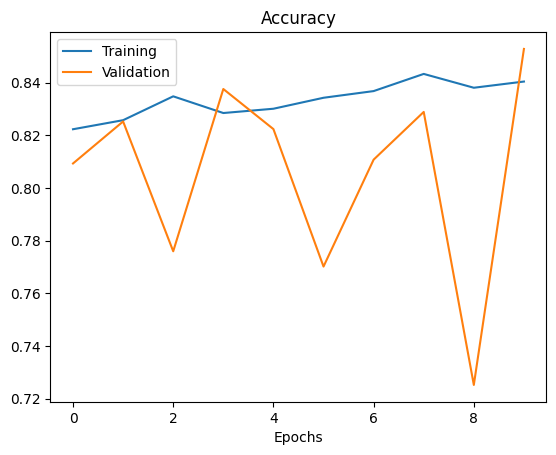

In [233]:
# to visualize comparison btw training set & validation set
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['Training', 'Validation'])
plt.title('Accuracy')
plt.xlabel('Epochs')

Classifying the images: Seeing the predicted vs the actual

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


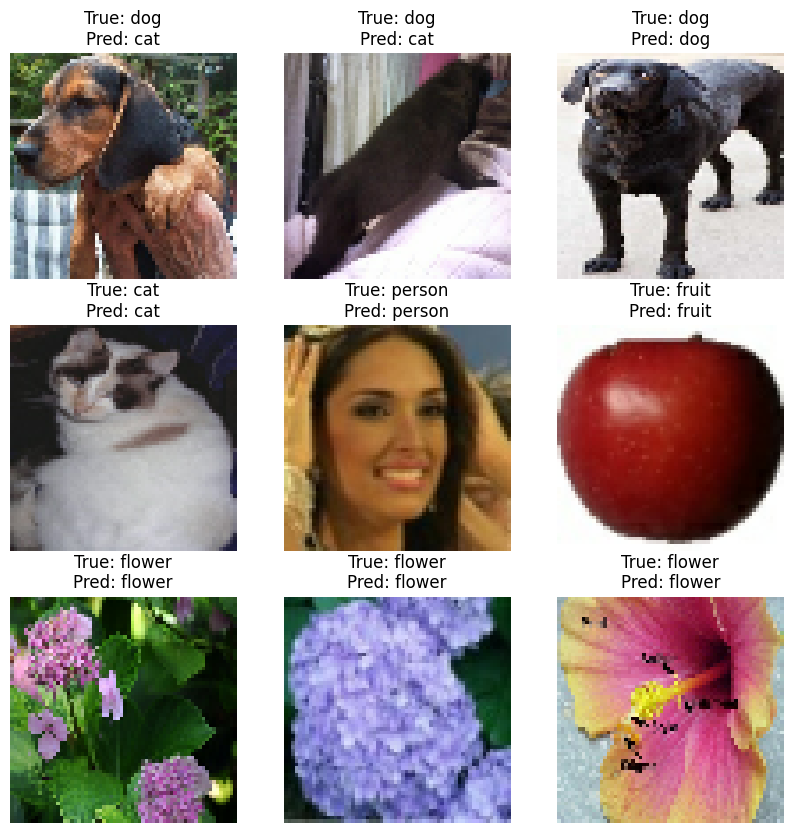

In [239]:
# Grabbing the images from the Natural Image Data Set
images, labels = next(iter(validation_data))
images = images[:9]
labels = labels[:9]

# our model prediction
predictions = fcn.predict(images)

class_names = training_data.class_names

# to display the images
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))

    # gets the actual name & predicted label
    true_name = class_names[labels[i]]
    pred_name = class_names[np.argmax(predictions[i])]

    plt.title(f"True: {true_name}\nPred: {pred_name}")
    plt.axis("off")

plt.show()

In [ ]:
# MODEL 2: SIMPLE CNN

In [ ]:
# PREDICTIONS